# Compare CESM2 historic conditions in line with ERA5

- Calculates spatial mean over full domain (removing land points) between 80S to 58S
- On the original ERA5 and CESM2 grids, grid cells not area-weighted (for simplicity, obviously not exactly correct)
- Annual means (easy to regrid to other frequencies)

In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import sys
import cmocean
import datetime
sys.path.append('/home/users/birgal/')
# from nemo_python_git.grid import region_mask

In [3]:
base_dir  = '/gws/nopw/j04/anthrofail/birgal/NEMO_AIS/'
cesm2_dir = f'{base_dir}climate-forcing/CESM2/LE2/'
era5_dir  = f'{base_dir}ERA5-forcing/'

In [4]:
ens_strs = ['1011.001', '1031.002', '1051.003', '1071.004', '1091.005', '1111.006', '1131.007', '1151.008', '1171.009', '1191.010']
var_mapping = {'TREFHT':'t2m','FSDS':'msdwswrf','FLDS':'msdwlwrf','QREFHT':'sph2m', 'PRECS':'msr', 'PRECT':'mtpr', 'PSL':'msl'}
#FLDS 1031, 1091, 1151 have some weird daily values; check if that is also true for some of the other files and why

In [5]:
mesh_mask = xr.open_dataset(f'{base_dir}bathymetry/mesh_mask-20250715.nc').squeeze()

In [6]:
def viz_timeseries(var_list, freq='1YE', xlim=(None,None)):

    fig, ax = plt.subplots(len(var_list),1, figsize=(11,4*len(var_list)))
    
    for v, var in enumerate(var_list):
        if len(var_list) == 1: 
            axis=ax
        else:
            axis = ax[v]

        # load timeseries
        ds_cesm2 = xr.open_dataset(f'{cesm2_dir}ensemble_mean/{var}_domain_mean_timeseries2.nc').resample(time=freq).mean()
        ds_era5  = xr.open_dataset(f'{era5_dir}climatology/{var}_domain_mean_timeseries2.nc').resample(time=freq).mean()
        ds_cesm2_corr = xr.open_dataset(f'{cesm2_dir}ensemble_mean/{var}_ens1011.001_bias_corr_domain_mean_timeseries.nc').resample(time_counter=freq).mean()
        ds_cesm2_pre  = xr.open_dataset(f'{cesm2_dir}ensemble_mean/{var}_ens1011.001_domain_mean_timeseries.nc').resample(time_counter=freq).mean()
        
        ds_cesm2_sum = 0
        for ens in ens_strs: 
            axis.plot(ds_cesm2.time, ds_cesm2[ens], c='#e1e3e2')
            ds_cesm2_sum = ds_cesm2_sum + ds_cesm2[ens]
        
        # add line for ensemble mean
        axis.plot(ds_cesm2.time, ds_cesm2_sum/len(ens_strs), c='#878787', label='CESM2 raw ensemble mean')
        # axis.plot(ds_cesm2.time, ds_cesm2['1011.001'], c='c', linestyle='--', label='CESM2 1011.001')
        axis.plot(ds_cesm2_pre.time_counter, ds_cesm2_pre[var], c='c', linestyle='--', label='CESM2 1011.001 processed')
        # add line for bias corrected mean
        axis.plot(ds_cesm2_corr.time_counter, ds_cesm2_corr[var], c='c', label='CESM2 1011.001 bias corrected')
    
        axis.plot(ds_era5.time, ds_era5[var_mapping[var]], c='k', label='ERA5')
        axis.legend(frameon=False, loc=2)
        axis.set_title(var)
        axis.set_xlim(xlim[0],xlim[1])

    return fig, ax

In [ ]:
fig, ax = viz_timeseries(['wind_speed'], freq='1YE')

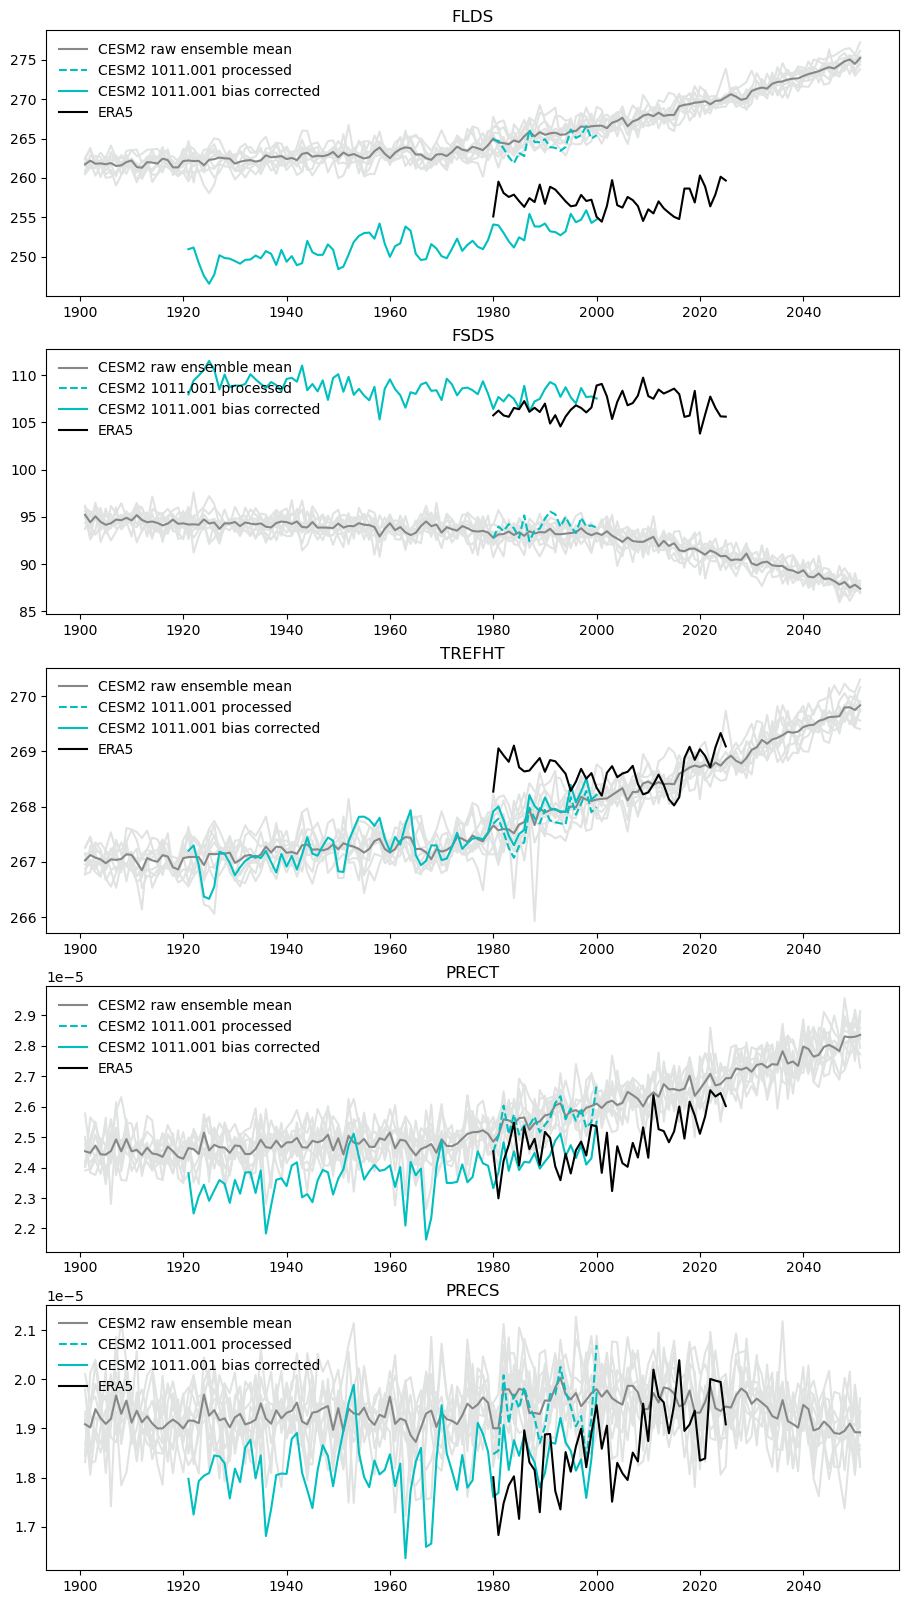

In [7]:
fig, ax = viz_timeseries(['FLDS','FSDS','TREFHT','PRECT','PRECS'], freq='1YE')

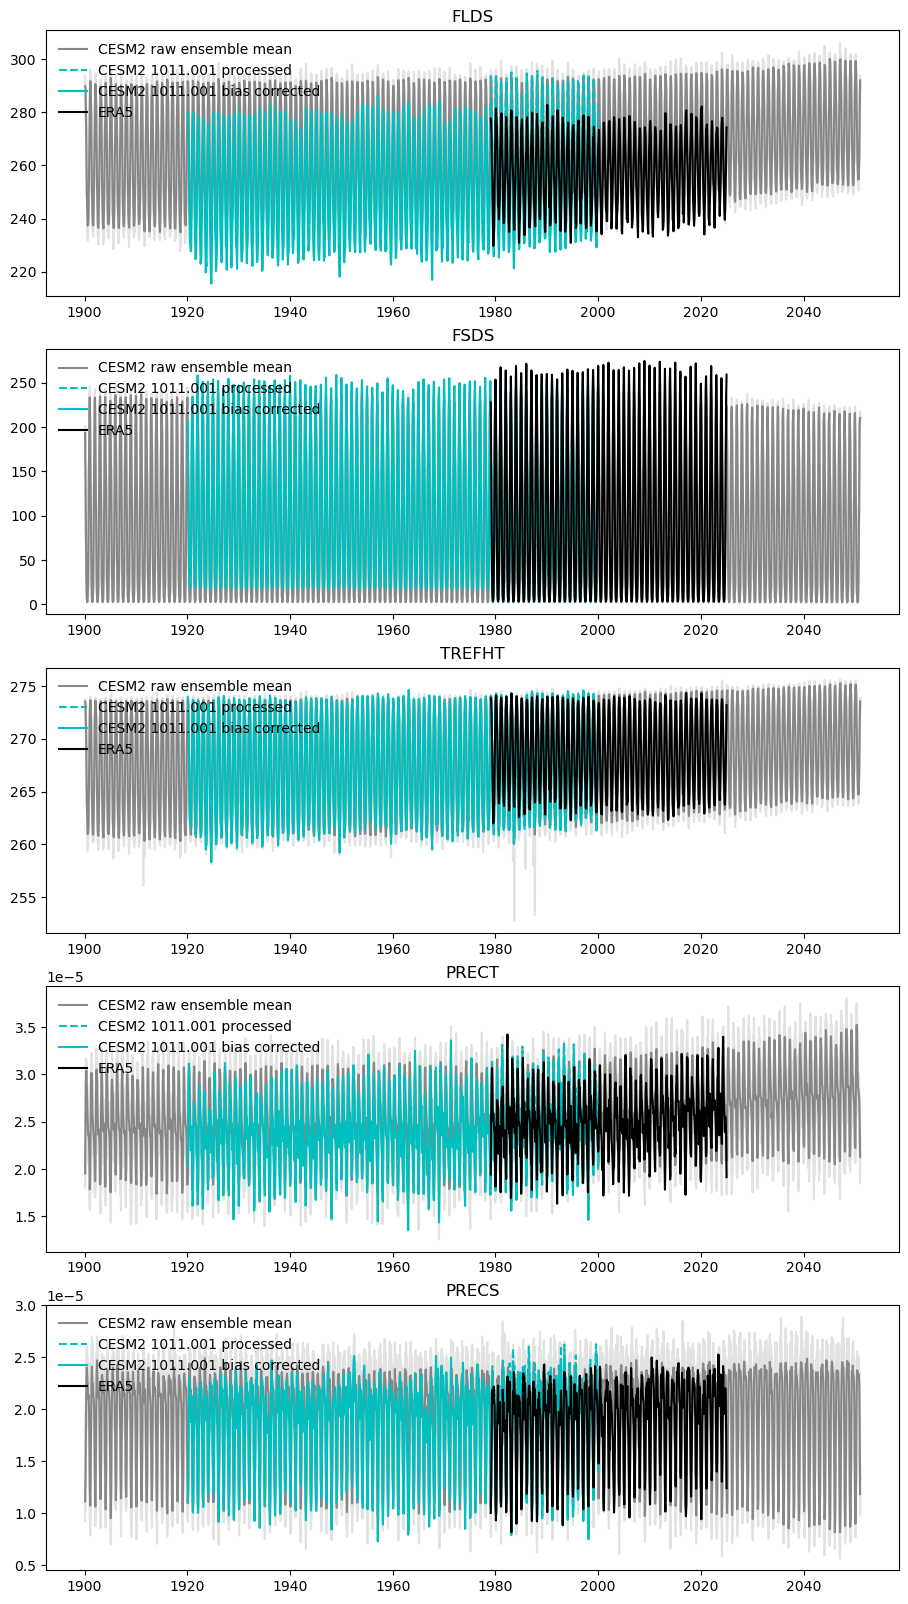

In [8]:
fig, ax = viz_timeseries(['FLDS','FSDS','TREFHT','PRECT','PRECS'], freq='1ME')